<a href="https://colab.research.google.com/github/dofoll/CIFAR10-AI_ML-ACCURACY/blob/main/Improving_the_Accuracy_of_CIFAR_10_Image_Classification_using_Convolutional_Neural_Network_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install numpy
#!pip install pandas
#!pip install keras
#!pip install matplotlib


In [ ]:
import keras

from keras.models import Sequential
from keras.layers import Dense
#from keras.utils import to_categorical

In [ ]:
#checking the backend that keras is using
keras.backend.backend()

'tensorflow'

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#import data
from keras.datasets import cifar10

In [ ]:
#reading the imported data
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [ ]:
#no of images in the train dataset
X_train.shape

(50000, 32, 32, 3)

In [ ]:
#no of images in the test dataset
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_test.shape

(10000, 1)

In [ ]:
#CHECKING TYPE OF ARRAY O FTHE DATASET\\

In [ ]:
X_train[5:]

array([[[[159, 102, 101],
         [150,  91,  95],
         [153,  95,  97],
         ...,
         [ 91,  71,  56],
         [ 74,  63,  55],
         [ 76,  58,  55]],

        [[142,  75,  68],
         [146,  72,  66],
         [155,  76,  65],
         ...,
         [127, 105,  71],
         [122, 111,  93],
         [ 86,  69,  61]],

        [[109,  67,  75],
         [ 99,  58,  60],
         [105,  59,  52],
         ...,
         [137, 112,  80],
         [163, 132, 105],
         [ 93,  72,  71]],

        ...,

        [[244, 129,  70],
         [240, 123,  65],
         [241, 122,  65],
         ...,
         [156,  42,  15],
         [179,  59,  26],
         [200,  73,  36]],

        [[246, 133,  74],
         [243, 128,  72],
         [243, 127,  70],
         ...,
         [162,  44,  14],
         [178,  56,  22],
         [192,  65,  27]],

        [[246, 139,  82],
         [243, 133,  78],
         [244, 132,  77],
         ...,
         [166,  47,  14],
        

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
#CONVERTING y_train and y_test FROM 2D ARRAY TO 1D ARRAY, SINCE 1D ARRAY IS GOOD ENOUGH FOR THE CLASSIFICATION

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

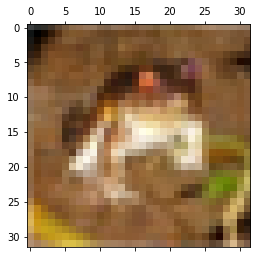

In [ ]:
#visualize the first image
plt.matshow(X_train[0])

In [ ]:
#INTRODCING THE CLASSES OF THE DATASET FOR PROPER LABELLING

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_preview(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

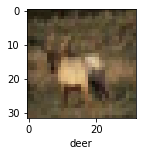

In [ ]:
plot_preview(X_train, y_train, 3)

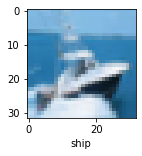

In [ ]:
plot_preview(X_train, y_train,8)

In [ ]:
#NORMALISE DATASET (x_train and x_test), SO THAT THE VALUES OF THE VARIABLE WOULD RANGE BETWEEN 0 AND 1

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [ ]:
#BUILDING CONVOLUTIONAL NEURAL NETWORK FOR IMAGE CLASSIFICATION

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 189s 120ms/step - loss: 1.3854 - accuracy: 0.5015
Epoch 2/20
1563/1563 [==============================] - 211s 135ms/step - loss: 0.9583 - accuracy: 0.6672
Epoch 3/20
1563/1563 [==============================] - 225s 144ms/step - loss: 0.7589 - accuracy: 0.7383
Epoch 4/20
1563/1563 [==============================] - 232s 149ms/step - loss: 0.6082 - accuracy: 0.7901
Epoch 5/20
1563/1563 [==============================] - 236s 151ms/step - loss: 0.4792 - accuracy: 0.8323
Epoch 6/20
1563/1563 [==============================] - 240s 153ms/step - loss: 0.3671 - accuracy: 0.8736
Epoch 7/20
1563/1563 [==============================] - 238s 152ms/step - loss: 0.2808 - accuracy: 0.9024
Epoch 8/20
1563/1563 [==============================] - 238s 152ms/step - loss: 0.2102 - accuracy: 0.9271
Epoch 9/20
1563/1563 [==============================] - 238s 152ms/step - loss: 0.1682 - accuracy: 0.9416
Epoch 10/20
1563/1563 [=======================

In [ ]:
#RUNNING CLASSIFICATION REPORT

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 7s 23ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.73      0.78      1000
           1       0.87      0.84      0.85      1000
           2       0.73      0.57      0.64      1000
           3       0.61      0.57      0.59      1000
           4       0.64      0.78      0.70      1000
           5       0.64      0.66      0.65      1000
           6       0.76      0.83      0.79      1000
           7       0.79      0.73      0.76      1000
           8       0.84      0.82      0.83      1000
           9       0.73      0.86      0.79      1000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000



In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 7s 22ms/step - loss: 1.7730 - accuracy: 0.7402


[1.7730391025543213, 0.7401999831199646]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:7]

313/313 [==============================] - 7s 22ms/step


array([[3.29044519e-06, 5.05597200e-08, 4.63223514e-05, 3.97587508e-01,
        4.00490752e-12, 6.02285504e-01, 1.02241654e-06, 1.22926794e-10,
        7.62912678e-05, 5.37118849e-10],
       [1.49711406e-11, 1.23317342e-03, 5.48611739e-22, 2.65893651e-18,
        5.49678836e-19, 7.69667654e-18, 5.53132121e-21, 2.97535264e-14,
        9.98551071e-01, 2.15706968e-04],
       [1.48546640e-02, 7.33836517e-02, 9.92796245e-09, 2.00263421e-05,
        2.94140656e-10, 1.55797526e-08, 3.32024638e-06, 1.18009522e-08,
        1.41642779e-01, 7.70095527e-01],
       [9.99912620e-01, 7.69214676e-05, 9.52239733e-16, 6.79407475e-10,
        4.60239256e-17, 3.58265370e-16, 9.33515943e-15, 1.14268442e-17,
        3.69665554e-06, 6.78064498e-06],
       [2.69580147e-17, 8.02622348e-17, 3.90665974e-07, 5.52637648e-05,
        9.99543488e-01, 3.77782056e-10, 4.00746125e-04, 3.89261512e-10,
        7.52440712e-14, 5.95548947e-13],
       [1.54073111e-18, 3.92700273e-18, 1.75541558e-12, 4.89793405e-12,
   

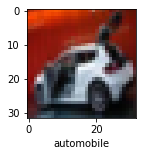

In [ ]:
plot_preview(X_test, y_test,6)

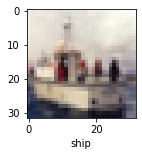

In [ ]:
plot_preview(X_test, y_test,88)

In [ ]:
classes[y_test[9998]]

'automobile'